# zomato data analysis project

# step1:import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step2:create data frame

In [19]:
dataframe = pd.read_csv(r"C:\Users\Paramita Sen\Zomato_data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [20]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# step3:data cleaning & eda

In [21]:
#convert data type of column rate , create a user defined function to change 3.9/5 to only 3.9 

In [22]:
def handlerate(value):
    value=str(value).split('/')
    value =value[0];
    return float(value)

In [23]:
dataframe['rate']=dataframe['rate'].apply(handlerate)

In [24]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# step4:check type of restaurant by their count of particular restaurant in our data

In [26]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturent')

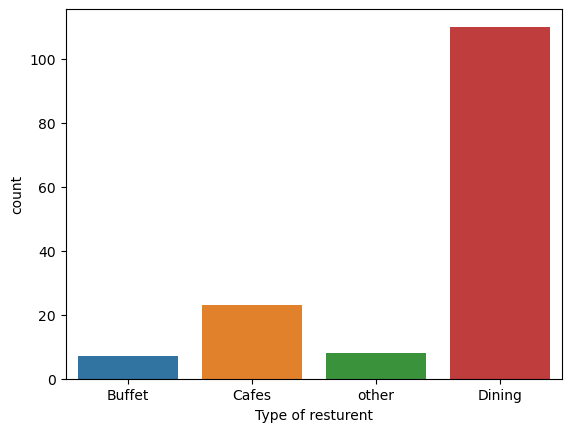

In [27]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of resturent")

# step5:check type of restaurant by their vote counts

Text(0, 0.5, 'votes')

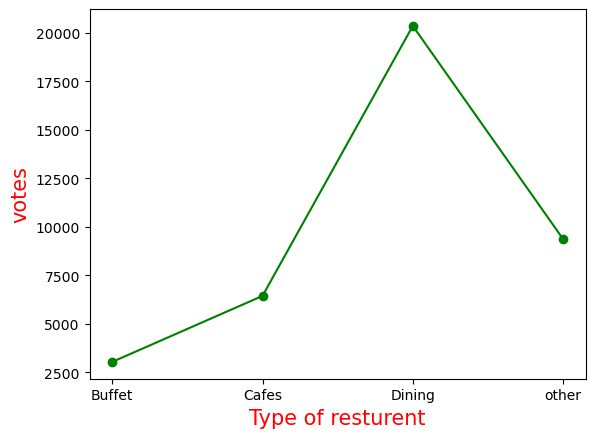

In [28]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker='o')
plt.xlabel("Type of resturent",c="red",size=15)
plt.ylabel("votes",c="red",size=15)


# step6:check rating distribution of restaurant 

<function matplotlib.pyplot.show(close=None, block=None)>

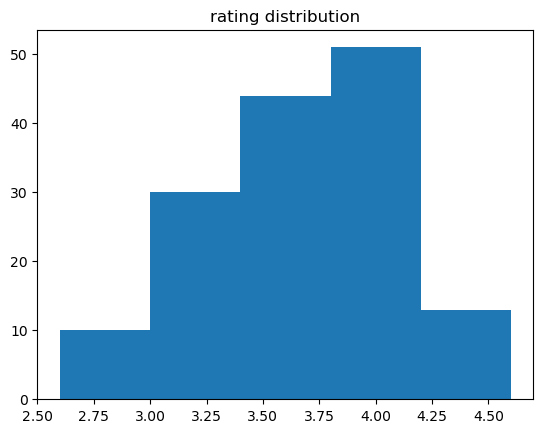

In [29]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show

# step7:check price for 2 people in max restaurant 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

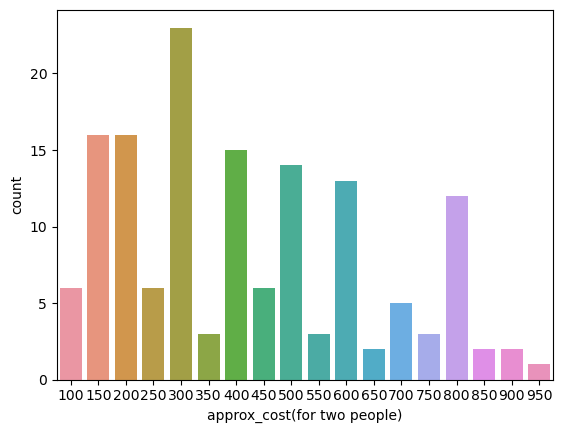

In [30]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# step8:check rating are better in online order or offline order

<Axes: xlabel='online_order', ylabel='rate'>

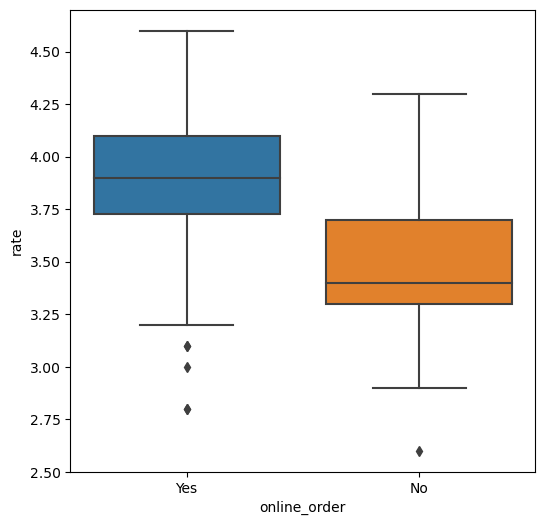

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# step9:check type of restaurant & their order type

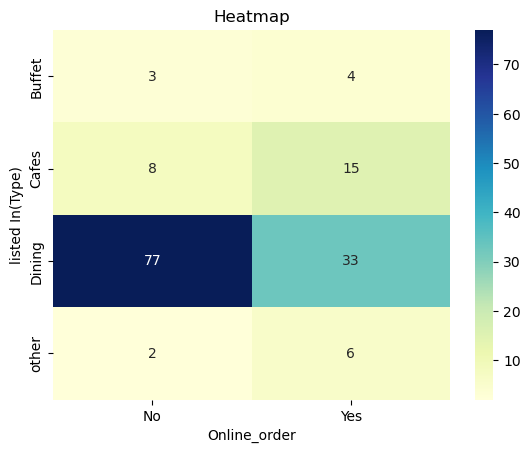

In [32]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online_order")
plt.ylabel("listed In(Type)")
plt.show()

# step10:conclusions

In [33]:
#1 Dining type of restaurants are mostly prefered & highly voted
#2 mostly people vote between 3.5 & 4.25
#3 for 2 people food of ~300 rs is ordered for max number of times
#4 Customers rate better in case of online orders
#5 offline dining is most preferable among all other online/ofline restaurant types 

# Thankyou